Reproduce of [Quantum, 2019, 3: 191.](https://doi.org/10.22331/q-2019-10-07-191)
The pure state time evolution with and without global phase correction.

In [2]:
from test1 import *

In test1.py I implement the quantum circuit for the elements in the time evolution equation. For instance, if we want the element $A_{x,z}^R=\frac{\partial{\langle\psi|}}{\partial \theta_x}\frac{|\psi\rangle}{\partial \theta_z}$, the quantum circuit is as follows:

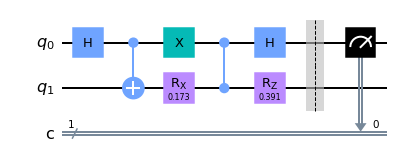

In [8]:
theta_x = 0.1734; theta_z = 0.3909
qc = measure_A(theta_x, theta_z, printqc=True)
qc.draw("mpl")

And the circuits for measuring the other elements are all contained within test1.py

The following code reproduces the Fig.2 in that literacture.

(0.0, 4.0)

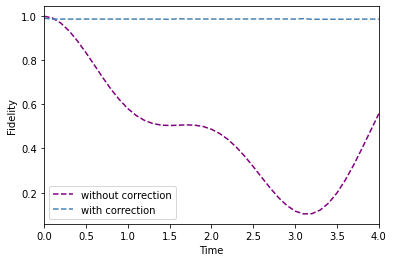

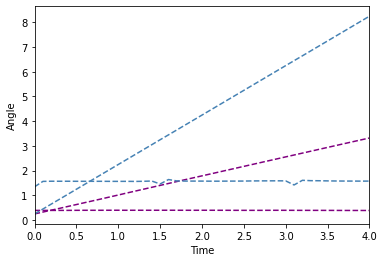

In [3]:
from qiskit.quantum_info import state_fidelity
fid1 = []
fid2 = []
Theta1 = []
Theta2 = []

theta1 = 0.1734; theta2= 0.3909 
for i in np.arange(0.0, 4.1, 0.1):
    grads = grad_theta(theta1, theta2, True)
    theta1 = theta1 + grads[0] * 0.1
    theta2 = theta2 + grads[1] * 0.1
    sv1 = get_state(theta1, theta2)
    sv2 = exact_evolve(i)
    fid1.append(state_fidelity(sv1, sv2))
    Theta1.append([theta1, theta2])
    
theta1 = 0.1734; theta2= 0.3909 
for i in np.arange(0.0, 4.1, 0.1):
    grads = grad_theta(theta1, theta2, False)
    theta1 = theta1 + grads[0] * 0.1
    theta2 = theta2 + grads[1] * 0.1
    sv1 = get_state(theta1, theta2)
    sv2 = exact_evolve(i)
    fid2.append(state_fidelity(sv1, sv2))
    Theta2.append([theta1, theta2])

import matplotlib.pyplot as plt
fig, axes = plt.subplots()
axes.plot(np.arange(0.0, 4.1, 0.1), fid2, '--', color='purple', label='without correction')
axes.plot(np.arange(0.0, 4.1, 0.1), fid1, '--', color='steelblue', label='with correction')
axes.set_ylabel("Fidelity")
axes.set_xlabel("Time")
axes.set_xlim(0, 4)
axes.legend()

fig, axes = plt.subplots()
axes.plot(np.arange(0.0, 4.1, 0.1), np.array(Theta2)[:, 0], '--', color='purple')
axes.plot(np.arange(0.0, 4.1, 0.1), np.array(Theta2)[:, 1], '--', color='purple')
axes.plot(np.arange(0.0, 4.1, 0.1), np.array(Theta1)[:, 0], '--', color='steelblue')
axes.plot(np.arange(0.0, 4.1, 0.1), np.array(Theta1)[:, 1], '--', color='steelblue')
axes.set_ylabel("Angle")
axes.set_xlabel("Time")
axes.set_xlim(0, 4)